In [1]:
from differences import ATTgt
from matplotlib import pyplot as plt
from analysis_utilities import aggregate_by_time_and_plot, aggregate_by_event_time_and_plot, \
    select_controls, test_balance, add_missing_indicators, prepare_df, generate_variable_names

plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
import pandas as pd

# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis.csv"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_140m/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_140m/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_csv(INPUT_DATA)

analysis='group_0_crimes_200m'

In [2]:
import numpy as np

value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = generate_variable_names(analysis=analysis)

# Uncomment below line for "any crime" analysis
# df[value_vars_crime] = np.where(df[value_vars_crime] > 0, 1, 0)

In [3]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                             Crime Incidents Within 140m, Dec. 2022   
                                                 \emph{Independent Variable}                                                          
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_0_crimes_140m                                 2.947252e-271   
                                                 pre_treatment_change_in_group_0_crimes_140m                           1.804350e-01   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                    9.188019e-04   
                                                 job_density_2013                                                      8.488684e-59   
                                                 med_hhinc2016                                                         1.423691e-03   
                                                 poor_share2010                                                        5.020026e-15   
                                                 popdensity2010                                                        7.243882e-11   
                                                 rent_twobed2015                                                       1.539690e-17   
                                                 share_white2010                                                       9.508584e-01   
                                                 traveltime15_2010                                                     1.779651e-29   
Panel C: Case Initiation                         for_cause                                                             9.848722e-01   
                                                 no_cause                                                              2.793216e-04   
                                                 non_payment                                                           3.469719e-02   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                              3.260086e-01   
                                                 hasAttyP                                                              1.639129e-03   
                                                 isEntityD                                                             2.063478e-02   
                                                 isEntityP                                                             1.019658e-09   

                                                                                                                
                                                                                             Plaintiff Victory  
                                                 \emph{Independent Variable}                                    
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_0_crimes_140m             9.021581e-01  
                                                 pre_treatment_change_in_group_0_crimes_140m      6.252453e-02  
Panel B: Census Tract Characteristics            frac_coll_plus2010                               2.403331e-01  
                                                 job_density_2013                                 1.626836e-01  
                                                 med_hhinc2016                                    1.910501e-01  
                                                 poor_share2010                                   1.428679e-01  
                                                 popdensity2010                                   5.946111e-02  
                                                 rent_twobed2015                                  5.003043e-01  
                                                 share_white2010                                  9.829904e-02  
                                                 travelt

In [4]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                                Cases Won by Plaintiff   
Panel A twenty_seventeen_group_0_crimes_140m                  9.726128   
Panel B Share with bachelor's degree                          0.322882   
        Jobs per square mile (2010)                       16069.137185   
        Median household income (2016)                    48035.651626   
        Share below poverty line                              0.273292   
        Population density (2010)                         23086.043553   
        Median two bedroom rent (2015)                     1339.985876   
        Share with commute $<$15 minutes (2010)               0.162315   
Panel C No cause                                              0.047744   
        Non-payment of rent                                   0.781742   
Panel D Plaintiff has an attorney                             0.879853   
        Defendant is an entity                                0.014166   
        Plaintiff is an entity                                0.808499   

                                                Difference in Cases Won by Defendant  \
                                                                          Unweighted   
Panel A twenty_seventeen_group_0_crimes_140m                                0.068361   
Panel B Share with bachelor's degree                                        0.014179   
        Jobs per square mile (2010)                                      3197.929971   
        Median household income (2016)                                   1777.651626   
        Share below poverty line                                            0.011240   
        Population density (2010)                                        1373.148087   
        Median two bedroom rent (2015)                                    -29.551242   
        Share with commute $<$15 minutes (2010)                             0.005986   
Panel C No cause                                                           -0.051771   
        Non-payment of rent                                                 0.068150   
Panel D Plaintiff has an attorney                                           0.071601   
        Defendant is an entity                                             -0.039232   
        Plaintiff is an entity                                              0.099762   

                                                                             \
                                                     \emph{p}      Weighted   
Panel A twenty_seventeen_group_0_crimes_140m     9.021581e-01      1.531328   
Panel B Share with bachelor's degree             2.403331e-01      0.071295   
        Jobs per square mile (2010)              1.626836e-01  12508.368614   
        Median household income (2016)           1.910501e-01   3376.528209   
        Share below poverty line                 1.428679e-01      0.002668   
        Population density (2010)                5.946111e-02    520.307068   
        Median two bedroom rent (2015)           5.003043e-01    176.049587   
        Share with commute $<$15 minutes (2010)  2.271578e-01      0.023492   
Panel C No cause                                 3.835665e-05     -0.111986   
        Non-payment of rent                      2.880676e-03      0.160556   
Panel D Plaintiff has an attorney                1.016046e-04      0.204821   
        Defendant is an entity                   4.881644e-07      0.014005   
        Plaintiff is an entity                   6.134468e-06      0.230746   

                                                               
                                                     \emph{p}  
Panel A twenty_seventeen_group_0_crimes_140m     1.409278e-01  
Panel B Share with bachelor's degree             1.194459e-03  
        Jobs per square mile (2010)              3.965983e-03  
        Median household income (2016)           1.902790e-01  
        Share below poverty line                 8.515976e-01  
      

In [5]:
# Store treatment date variable -- may be either file_date or latest_docket_date -- and drop rows where missing.
treatment_date_variable = 'file_date'
treatment_month_variable = treatment_date_variable.replace('date', 'month')

# Generate indicators for missing data.
add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = prepare_df(df, analysis, treatment_date_variable, pre_treatment_covariates, value_vars_crime, month_to_int_dictionary)

In [6]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 2184/2184 [00:13<00:00, 166.83it/s]


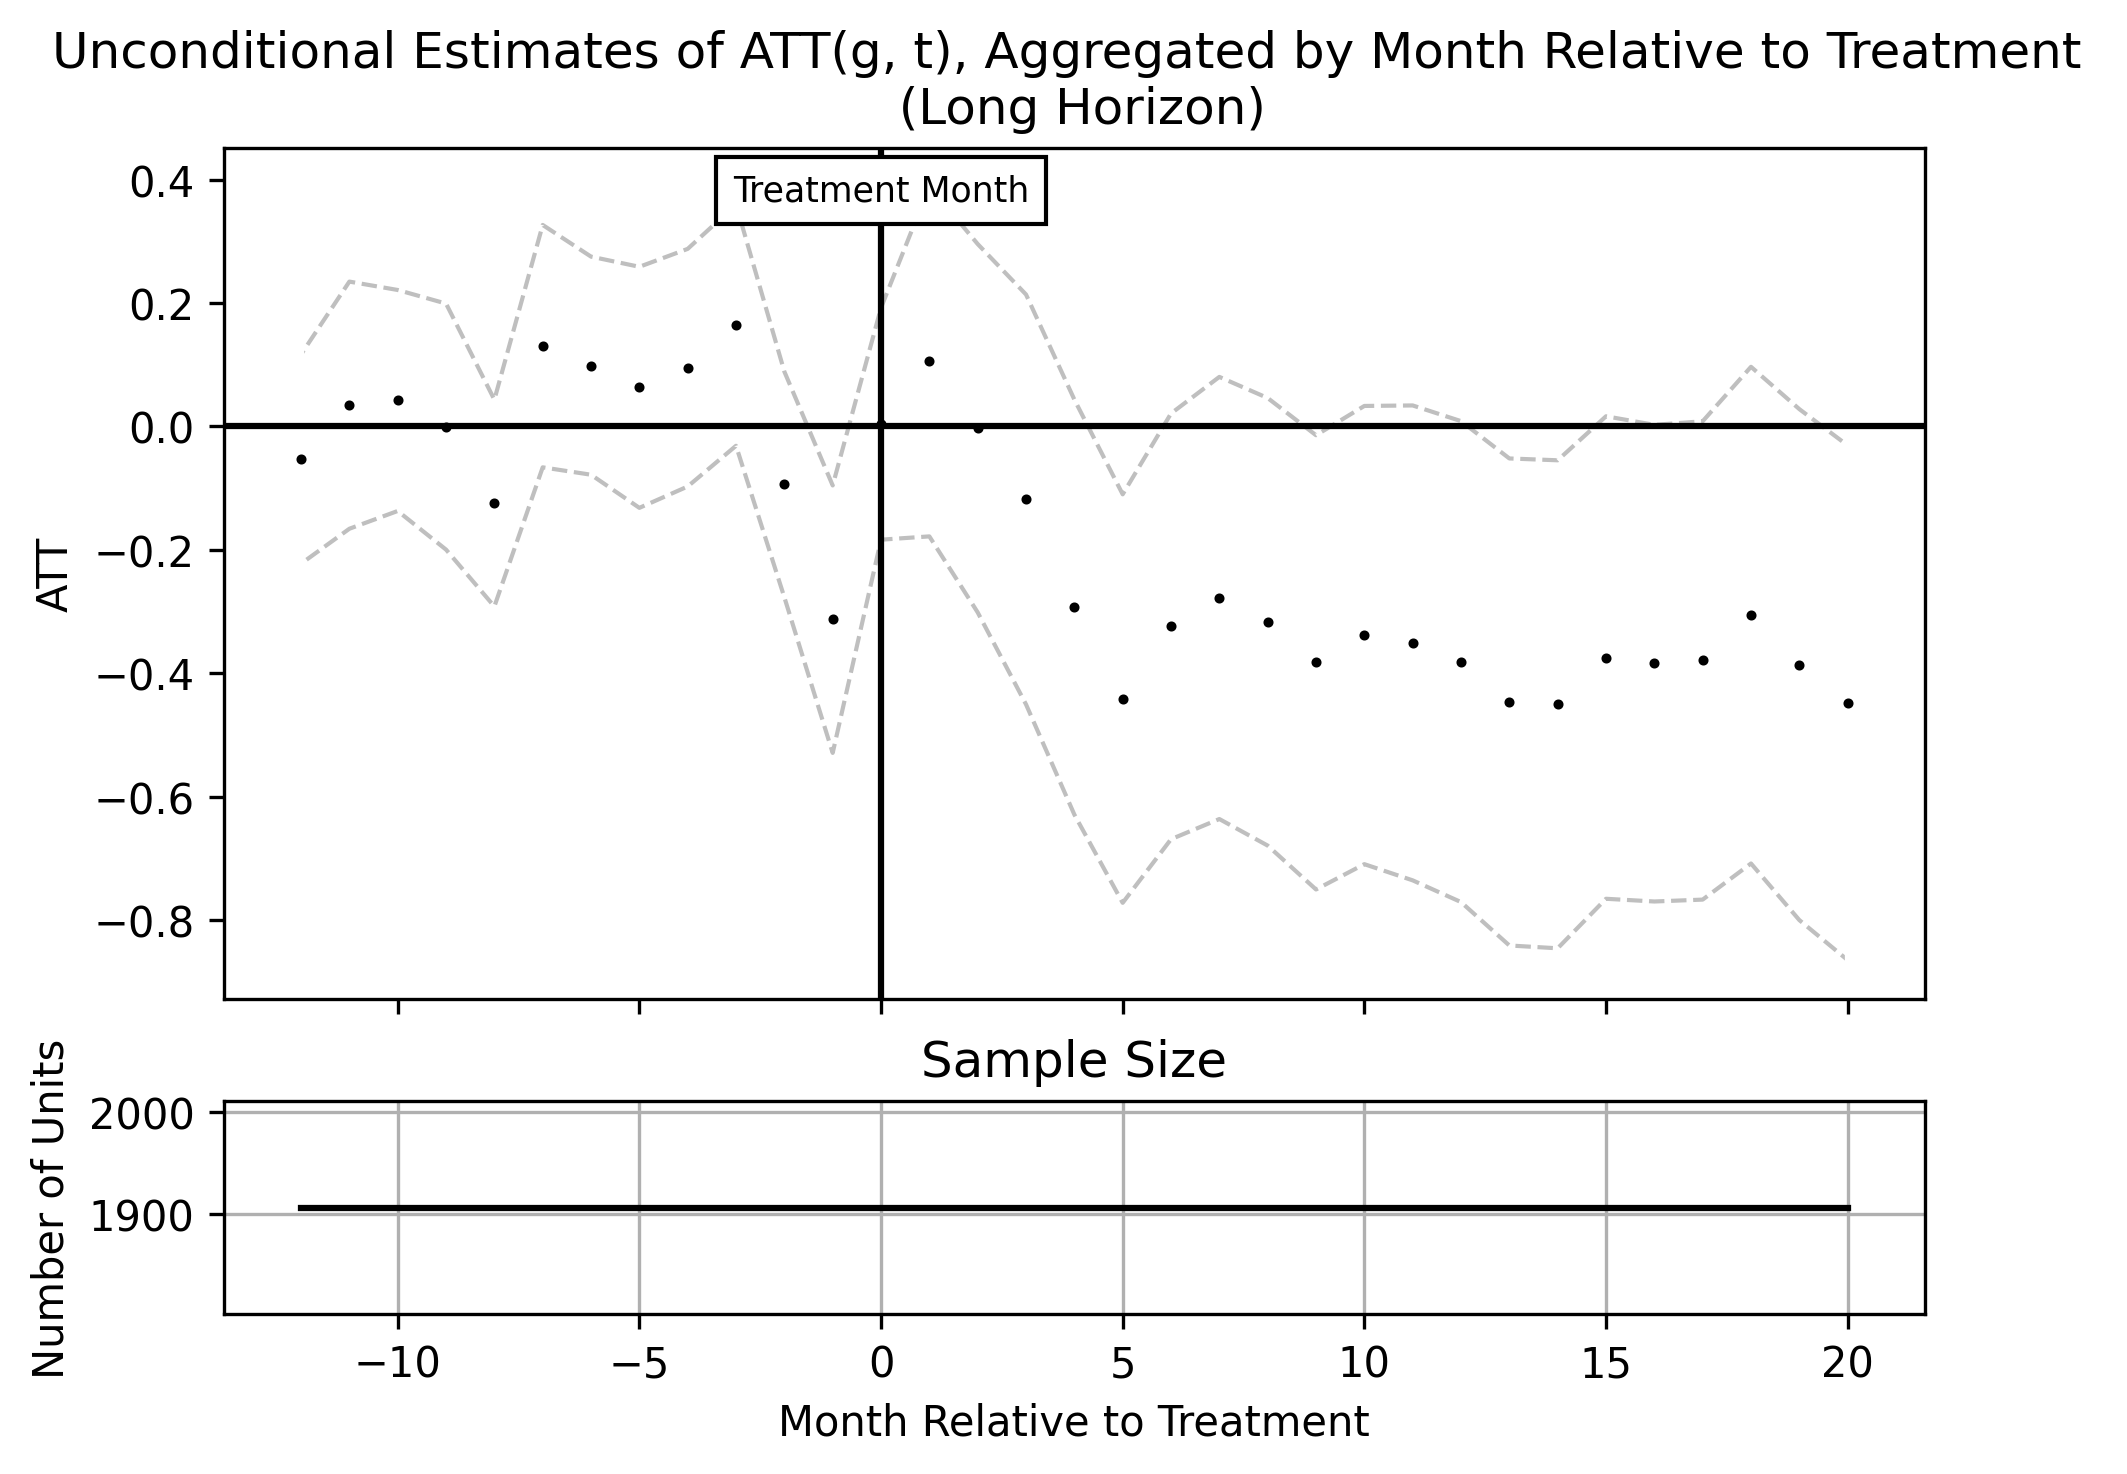

In [7]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-12, end_period=20,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

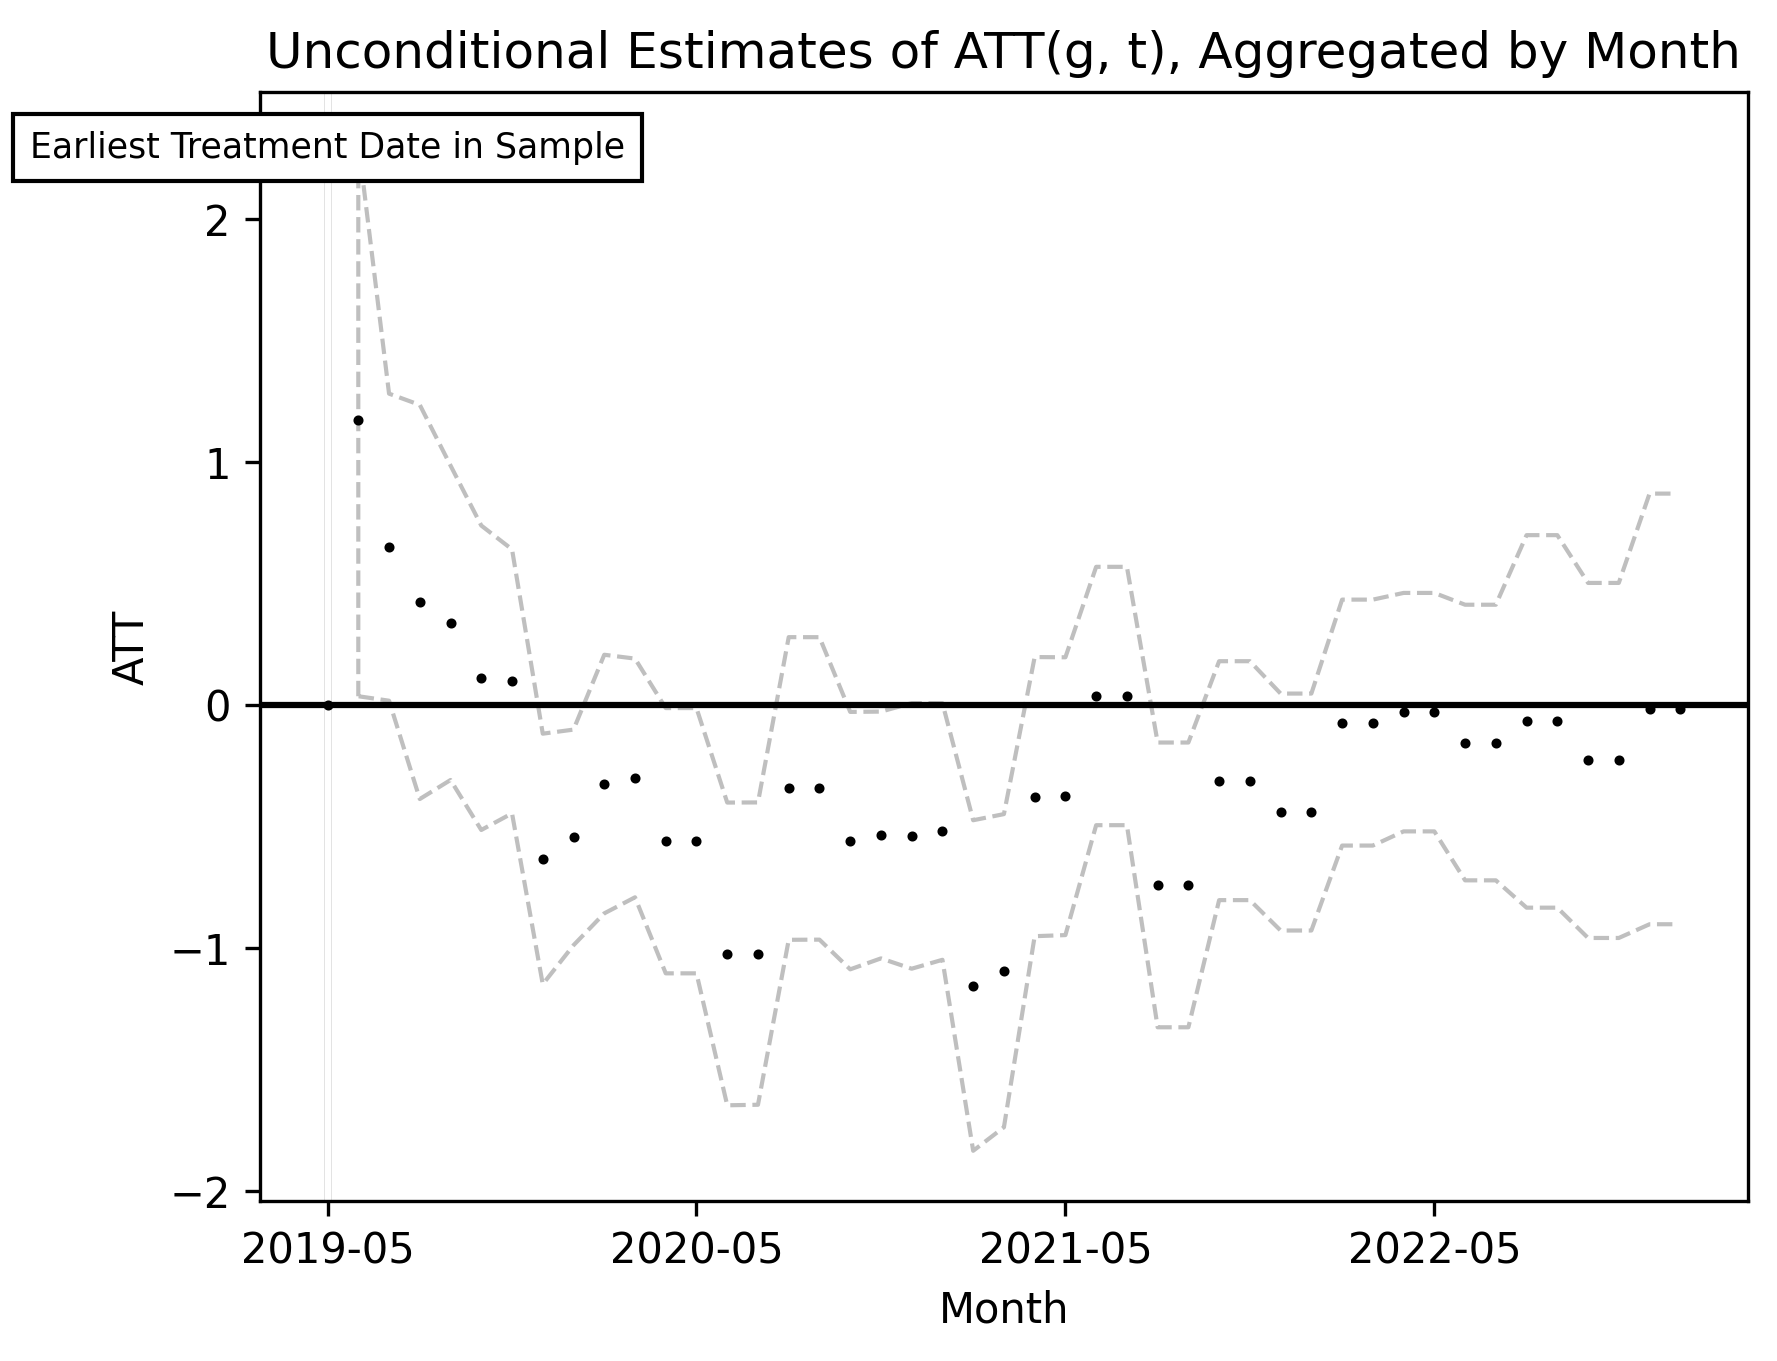

In [8]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [9]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]   50%|█████████▉          | 1086/2184 [00:25<00:19, 55.96it/s]/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/differences/did/att_if.py:27: RuntimeWarning: divide by zero encountered in divide
  w_cont = weights * ps_fit * ((1 - treated) / (1 - ps_fit))
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/differences/did/att_if.py:30: RuntimeWarning: invalid value encountered in multiply
  dr_att_cont = w_cont * (endog - out_delta)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/diffe

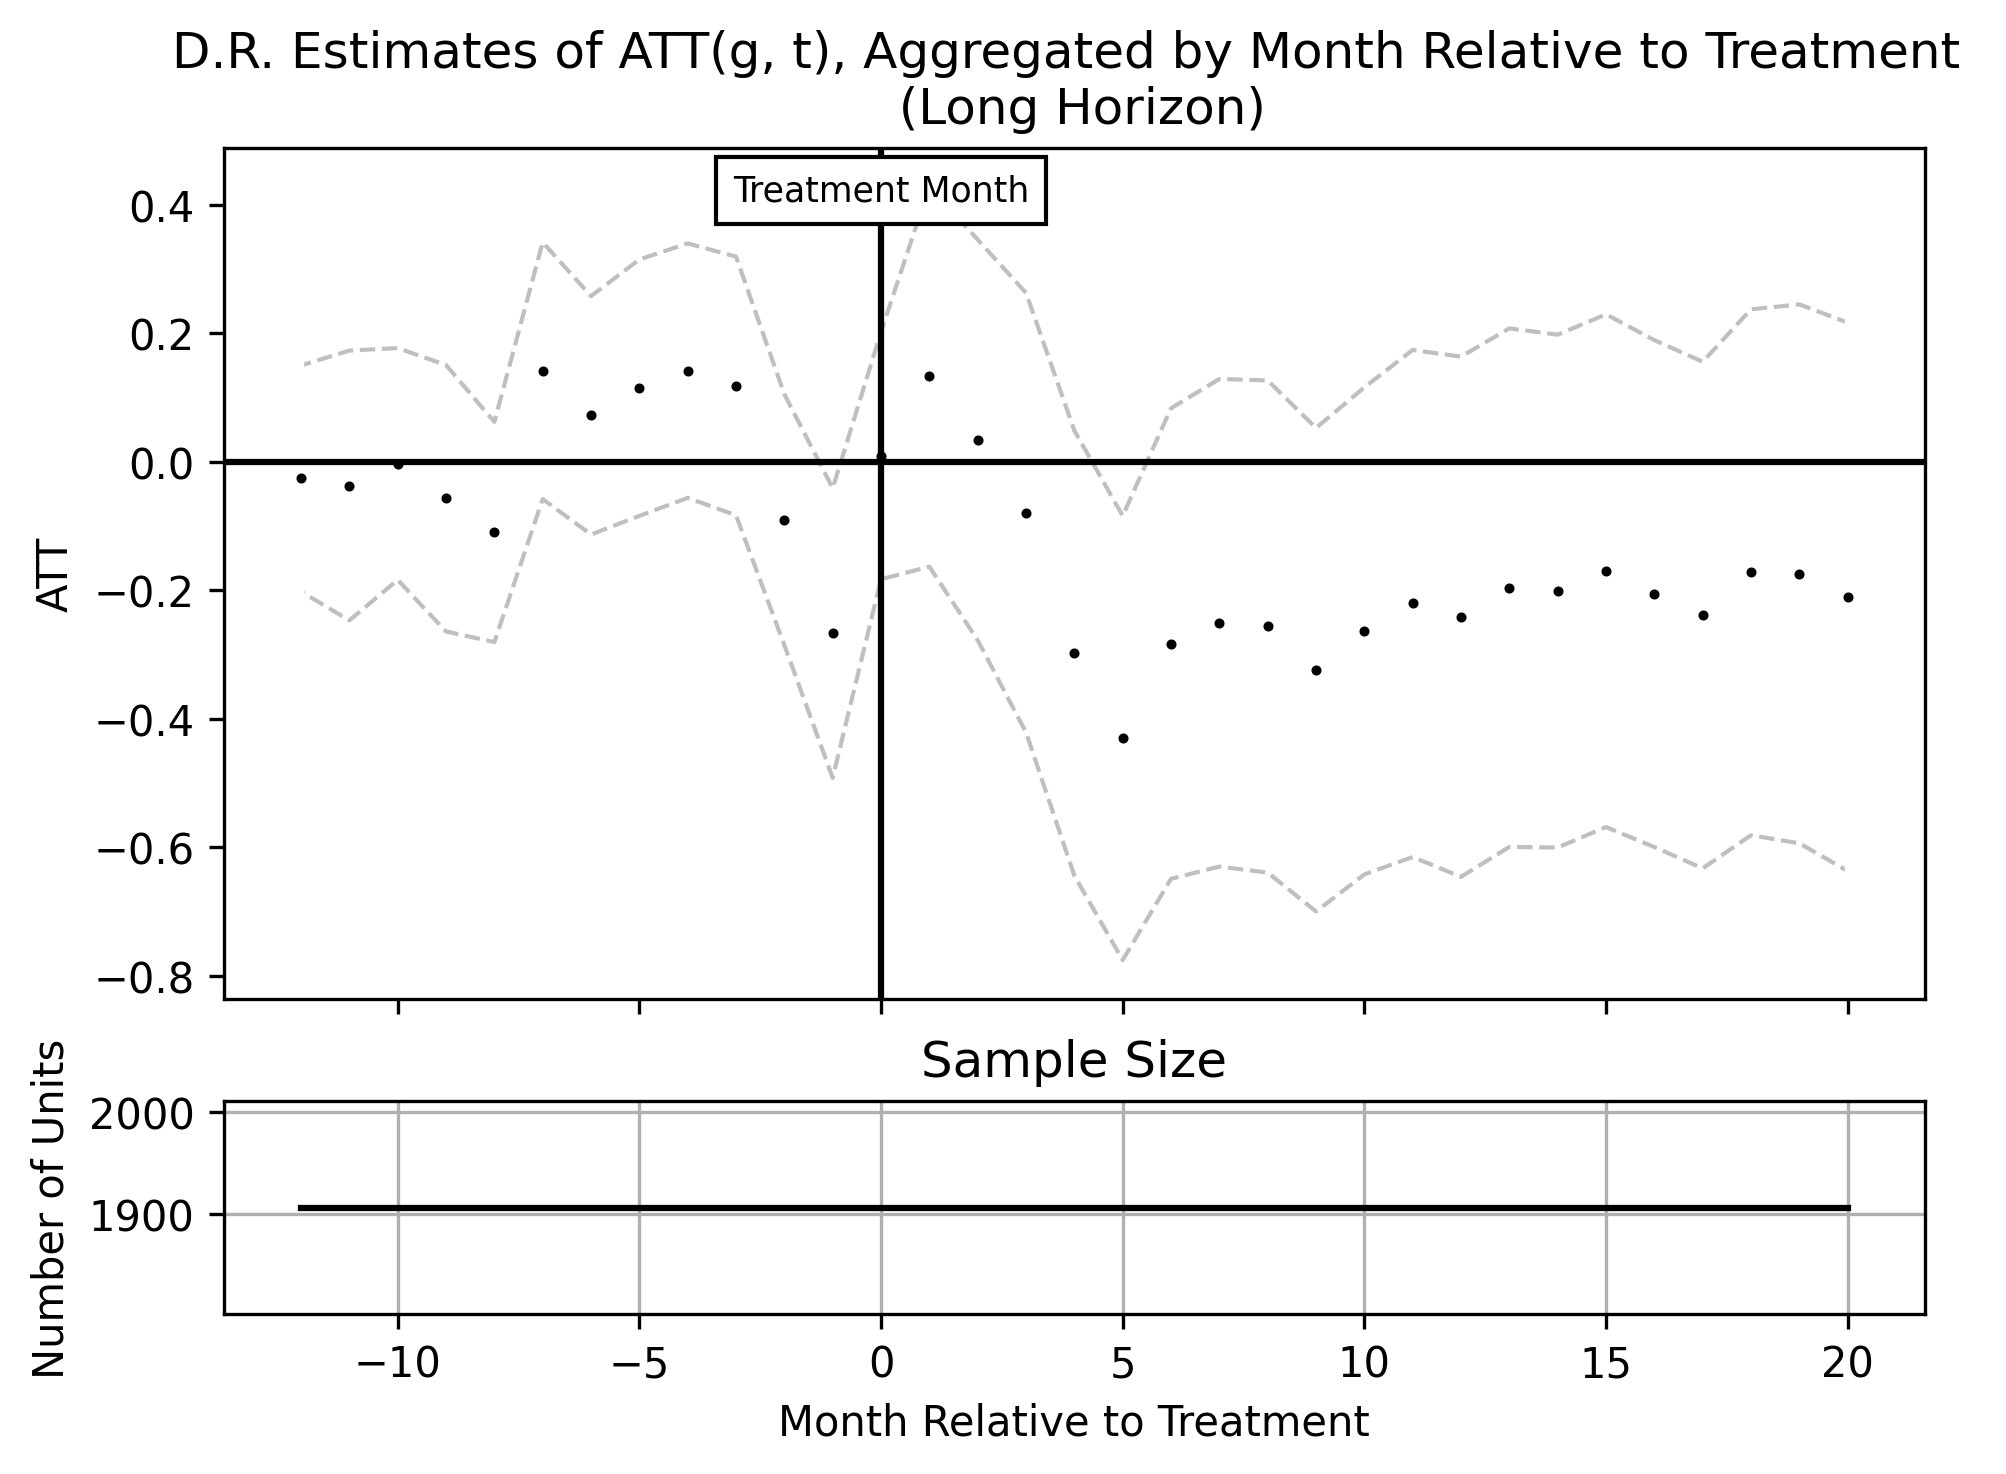

In [10]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-12,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

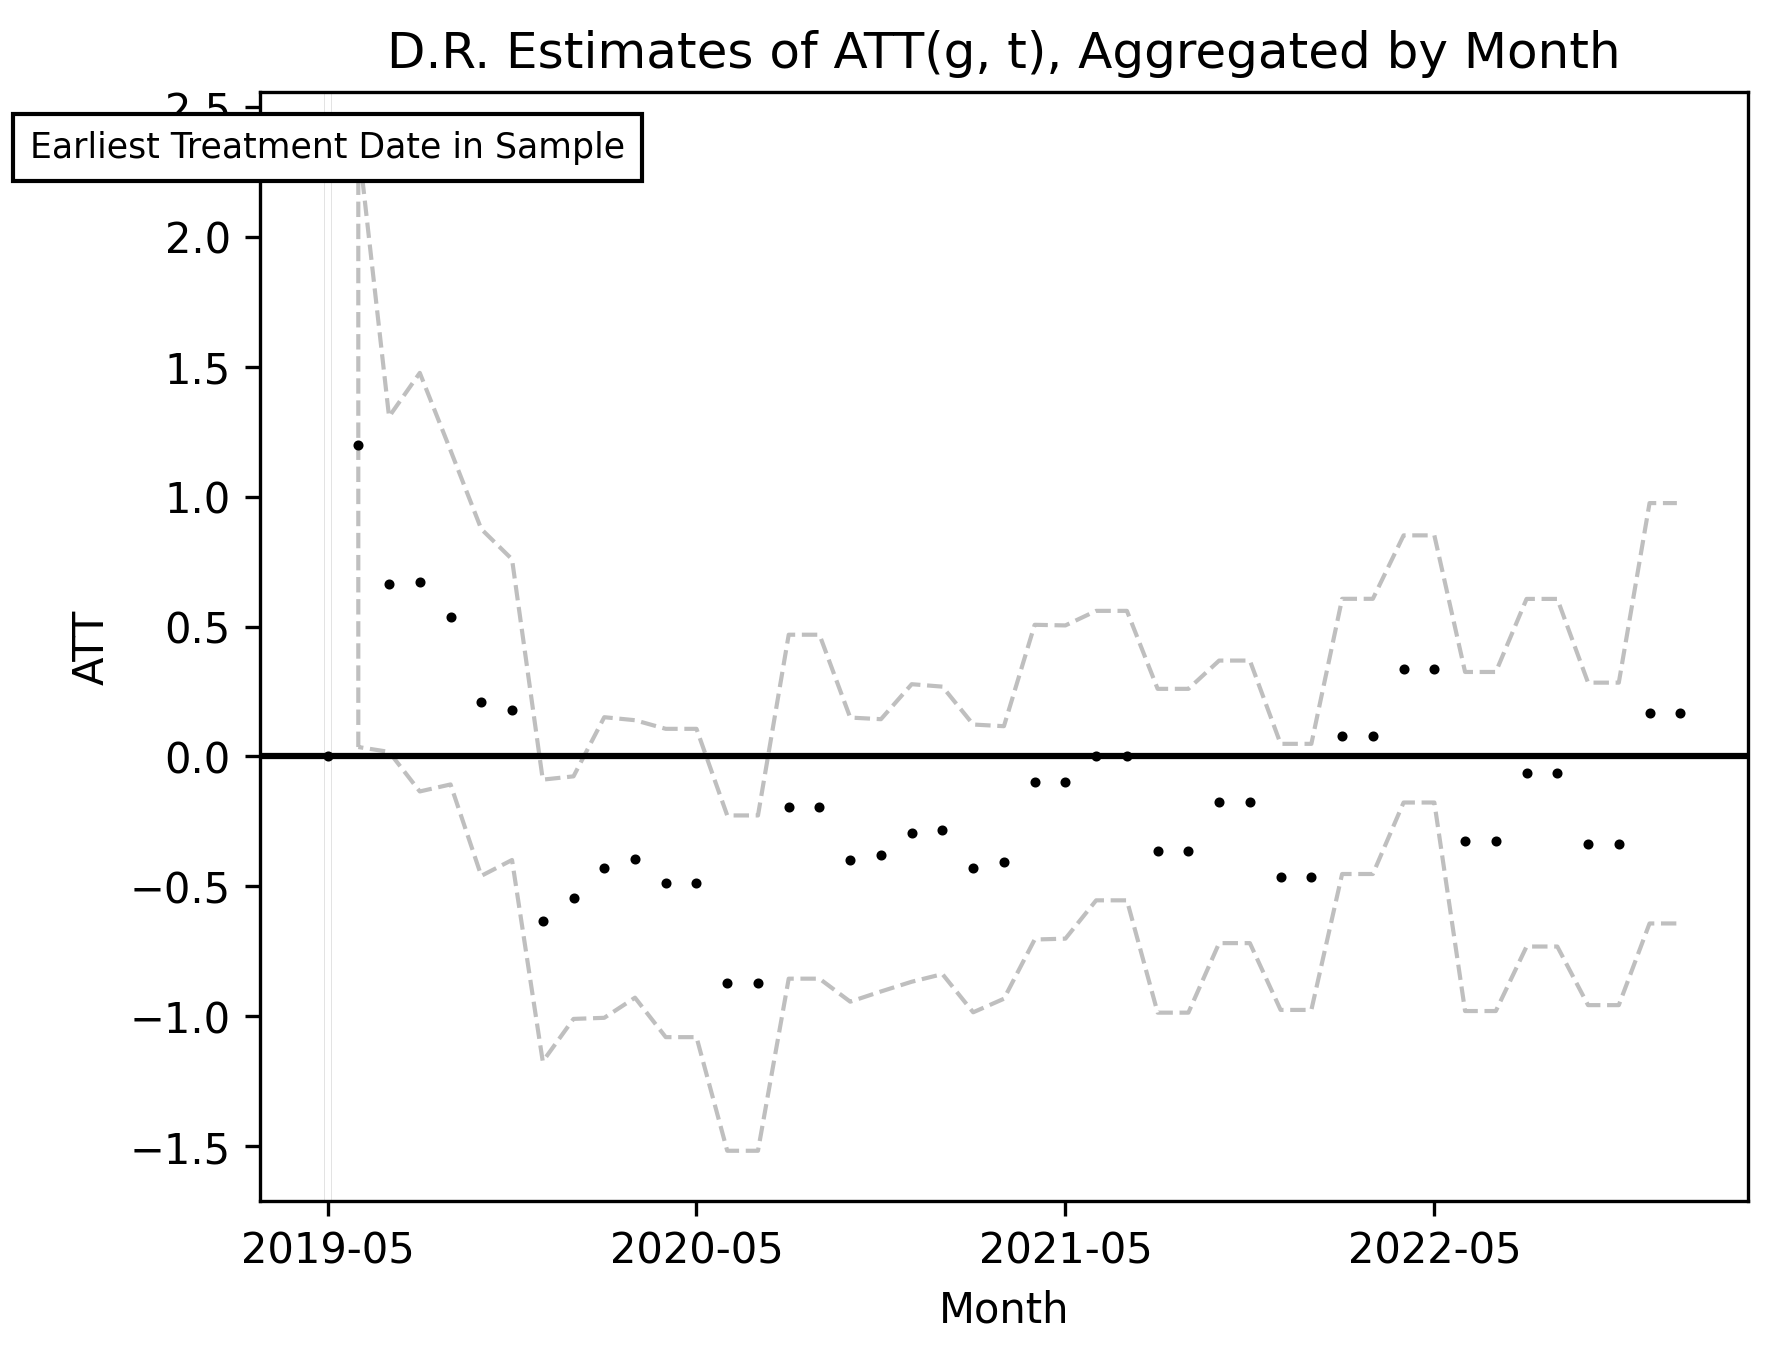

In [11]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")